# Introduction aux outils numériques

Nous allons faire un survol de quelques commandes que nous utiliserons dans les autres TP numériques. 

## Objectifs de cette séance

Que vous ayez une formation de base en Matlab, en Python, ou aucun souvenir de programmation, nous allons réaliser des opérations simples que nous employerons sur des problèmes d'aérodynamique par la suite. 

Réalisez les exercices dans ce notebook pour vous familiariser avec les commandes python.

## Modules

Comme Matlab, Python est langage interprété. Il n'y a pas besoin de déclarer les variables, ni de compiler le code.  On s'appuie sur des fonctions pré-compilées pour rendre les opérations de calcul efficace. 

Il existe un grand nombre de fonctions précompilées pour python, mais toutes ne chargées automatiquement. Il faut donc toujours importer ce dont on a besoin. On charge des modules. Dans le cadre de ce cours, nous aurons besoin principalement de `numpy` pour les manipulation de tableaux, `matplotlib` pour les tracés de courbes. Pour le calcul symbolique (en remplacement de la TI) nous utiliserons `sympy`. Pour le chargement de fichiers dans le cadre du projet nous utiliserons le module `pandas`.

[NumPy](https://numpy.org/doc/stable/user/basics.html) est une bibliothèque d'objets et de fonctions adaptés au calcul vectoriel c'est-à-dire à des opérations sur des listes ou tableaux (N-dimensions) homogènes de nombres (_array_). Grace à cette bibliothèque, les opérations principales que l'on réalise avec Matlab sont réalisable sous Python. Souvent les fonctions ont le même nom. 

[MatplotLib](https://matplotlib.org/stable/tutorials/introductory/usage.html) est une bibliothèque d'objets et de fonctions pour réaliser des représentations graphiques 2D comme dans Matlab (et certainement même plus !). On utilise le sous-module `pyplot` qui contient tout ce dont on a besoin.

[SymPy](https://docs.sympy.org/latest/tutorial/index.html#tutorial) est une bibliothèque d'objets et de fonctions pour réaliser des calculs mathématiques symboliques. ous utiliserons notamment les intégrations de fonctions mathématiques dans le cadre de la théorie des profils minces. 

[Pandas](https://pandas.pydata.org/docs/getting_started/index.html) est une bibliothèque d'objets et de fonctions pour traiter des données sous forme de tableaux colonne. C'est un peu comme un tableau excel dans Python. En particulier, nous l'utiliserons pour charger des fichiers `*.csv`.

## Chargement d'un module ou sous module

Pour charger un module, on utilise la fonction `import` et on lui donne un petit nom pour raccourcir nos appels. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Pour avoir des graphiques de bonne qualité, nous utilisons les paramètres suivants.

In [2]:
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

Voilà vous êtes prêt ! 

## Exercice 1 - Intersection de deux droites

On souhaite calculer le point d'intersection de deux droites définies par les équations suivantes : 
\begin{equation}
y = 2 x -5 \hspace{2cm} \text{et} \hspace{2cm} 
y = -x + 3
\end{equation}

1. Construisez les tableaux suivants : 
  * `x` de 20 points uniformément répartis de -5 à 5. Utilisez la fonction `linspace` de `numpy`.
  * `y1` et `y2` les ordonnées des points aux abscisses `x` des points sur les droites 1 et 2. 

In [3]:
x = np.linspace(-5,5,20)
y1 = 2*x-5
y2 = -x+3

2. Tracez les deux droites ainsi définies : 
  * La droite 1 en bleu, la droite 2 en rouge et en pointillés.
  * Affichez une grille, une légende et des labels sur les axes.

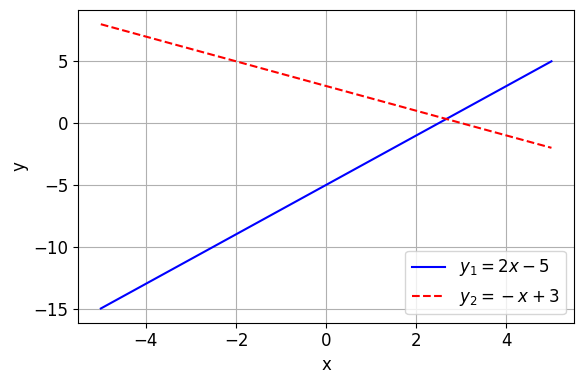

In [4]:
plt.plot(x,y1,color='blue',label=r'$y_1=2x-5$')
plt.plot(x,y2,color='red',linestyle='--',label=r'$y_2=-x+3$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

3. Définissez le problème matriciel $M X = B$ à résoudre pour trouver l'intersection des droites et créez les tableaux numpy `M` et `B`. Utilisez la fonction `array`, vérifiez les formes avec `shape` et utilisez `reshape` pour corriger. 

In [5]:
M = np.array(((2,-1),(-1,-1)))
B = np.array((5,-3)).reshape((2,1))

In [6]:
print(M)

[[ 2 -1]
 [-1 -1]]


In [7]:
print(B)

[[ 5]
 [-3]]


4. Résolvez le problème en utilisant le sous-module d'algèbre linéaire [`linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html#solving-equations-and-inverting-matrices) de `numpy`. Le produit matriciel (`dot`) est implémenté avec le symbole `@`

In [8]:
X_intersection = np.linalg.inv(M) @ B

5. Reprennez la figure de la question 2 et ajoutez le point d'intersection avec un symbole vert. Si l'intersection n'est pas correcte, vérifiez vos matrices et leurs formes. Enregistrez la figure sous un format image. 

In [9]:
X_intersection.shape

(2, 1)

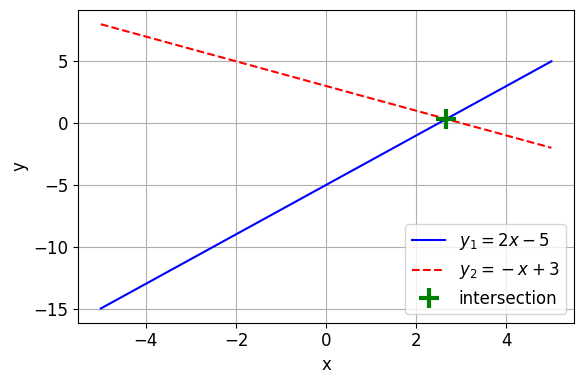

In [10]:
plt.plot(x,y1,color='blue',label=r'$y_1=2x-5$')
plt.plot(x,y2,color='red',linestyle='--',label=r'$y_2=-x+3$')
plt.plot(X_intersection[0,0],X_intersection[1,0],marker='+',markersize=15,color='green',label='intersection',linestyle='none',markeredgewidth=3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.savefig('exercice1_intersection.png')
plt.show()

## Exercice 2 - Les profils NACA 4 chiffres symmétriques

Les profils NACA sont des formes d'aile testées par le [National Advisory Committee for Aeronautics](https://fr.wikipedia.org/wiki/National_Advisory_Committee_for_Aeronautics). C'est des profils dont la forme correspond à une équation mathématique dont les formes sont paramétrées et dont les coefficients aérodynamiques en fonction de l'incidence (angle d'attaque) ont été mesurés de manière systématique en soufflerie. 

Ici on s'intéressera aux profils dits 4 chiffres symmétrique `NACA00XX`. Il sont définis par 2 paramètres : 
  * La corde du profil $c$ (distance bord d'attaque/bord de fuite).
  * L'épaisseur maximale du profil est caractérisée par le paramètre $t$ qui est un pourcentage de la corde : 
\begin{equation}
t = \frac{\texttt{XX}}{100}
\end{equation}

On définit la coordoonnée $x_c$ qui varie de 0 à 1 le long de la corde. La demi-épaisseur du profil $y_t$ (distance entre ses deux côtés) est alors paramétrée en fonction de cette coordonnée par l'équation suivante : 
\begin{equation}
y_t = 5 t \left( 0.2969 \sqrt{x_c} - 0.1260 \,  x_c - 0.3516 \, x_c^2 + 0.2843 \, x_c^3 - 0.1036 \, x_c^4\right)
\end{equation}

Ainsi un profil dont la forme pourra être obtenue grace au deux courbes (redimmensionnées): 

\begin{align}
x_{up} &= x_c \, c   & et \hspace{1cm}  y_{up} &= + y_t \, c \\
x_{down} &= x_c \, c  & et \hspace{1cm}  y_{down} &= - y_t \, c 
\end{align}

Pour les questions suivantes, n'hésitez pas à contacter l'enseignant. Les questions sont choisies pour vous faire réfléchir et découvrir des options des modules.

1. Construisez et tracez le profil NACA0012 de corde 18 cm avec 15 points de chaque côté. 

In [11]:
# Parametres du profil
corde = 0.18
chiffres34 = 12
coeff_naca = [0.2969,-0.1260,-0.3516,0.2843,-0.1036]
pow_naca = [0.5,1,2,3,4]
# Parametre de discretisation
npts = 15

In [12]:
# Coordonnees de corde xc
xc = np.linspace(0,1,npts)
# Fonction yt
yt = np.zeros_like(xc)
for i in range(len(coeff_naca)):
    yt += coeff_naca[i]*xc**pow_naca[i]
yt *= 5*chiffres34/100.

In [13]:
# Extrados xup, yup
xup = xc*corde
yup = yt*corde
# Intrados xdown,ydown
xdown = xc*corde
ydown = -yt*corde

2. Déterminez l'épaisseur maximum obtenue et la position sur la corde où ce point est atteint. Que pouvez vous dire ?

In [14]:
# Epaisseur yup-ydown
thickness = yup-ydown
# Maximum et position le long de la corde
tmax = thickness.max()
print(f'Maximum épaisseur: {tmax} m')
print(f'Maximum épaisseur/corde: {100*tmax/corde} %')
index_loc_tmax = thickness.argmax()
xc_tmax = xc[index_loc_tmax]
print(f'Position maximum épaisseur: {100*xc_tmax} %')

Maximum épaisseur: 0.02158665323312423 m
Maximum épaisseur/corde: 11.992585129513461 %
Position maximum épaisseur: 28.57142857142857 %


3. Tracez le profil, ajoutez une legende (extrados/intrados), une grille, des labels aux axes et un titre

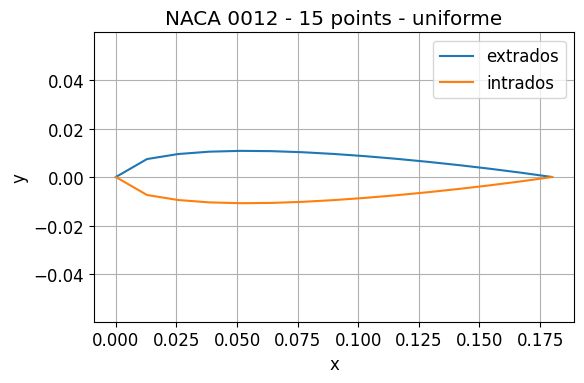

In [15]:
# Trace dimensionnel 
plt.plot(xup,yup,label='extrados')
plt.plot(xdown,ydown,label='intrados')
plt.title(f'NACA 00{chiffres34} - {npts} points - uniforme')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

4. Chargez les coordonnées du NACA 0012 du fichier `naca0012.txt` avec la fonction `loadtxt` de numpy, puis comparez votre profil construit précédemment à ces données.

In [16]:
# On doit ignorer la première ligne d'en-tête
verif = np.loadtxt('naca0012.txt',skiprows=1)

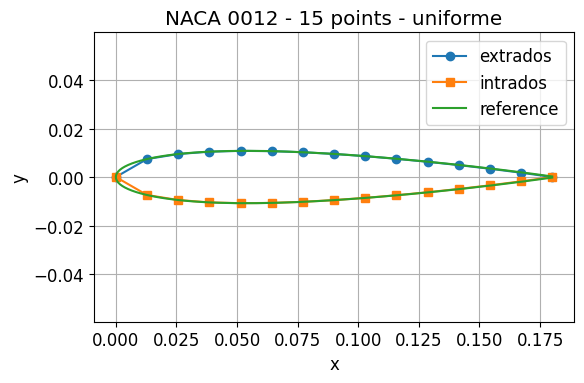

In [17]:
# Trace dimensionnel 
plt.plot(xup,yup,label='extrados',marker='o')
plt.plot(xdown,ydown,label='intrados',marker='s')
# : pour afficher toutes les lignes
# on trace en dimentionnel, les donnees sont adimensionnelles
plt.plot(verif[:,0]*corde,verif[:,1]*corde,label='reference')
plt.title(f'NACA 00{chiffres34} - {npts} points - uniforme')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

C'est pas très beau il faudrait une autre discrétisation plus raffinée au bord d'attaque. Nous verrons pour cela la transformation de Glauert. Une petite démo ci-dessous. Les points ne sont plus uniformes mais concentrés au bord d'attaque et au bord de fuite. 
On utilise le paramètre $\xi$ placé sur un demi cercle, et on calcule les position $x$ par projection. 
\begin{equation}
x_c = \frac{1}{2} \left(1-\cos{\xi}\right) \quad \quad \xi \in [0,\pi]
\end{equation}

In [18]:
xi = np.linspace(0,np.pi,npts)
xc = 0.5*(1-np.cos(xi))
# Fonction yt
yt = np.zeros_like(xc)
for i in range(len(coeff_naca)):
    yt += coeff_naca[i]*xc**pow_naca[i]
yt *= 5*chiffres34/100.

In [19]:
# Extrados xup, yup
xup = xc*corde
yup = yt*corde
# Intrados xdown,ydown
xdown = xc*corde
ydown = -yt*corde

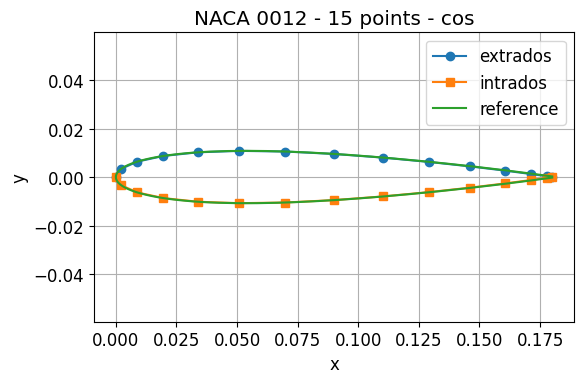

In [20]:
# Trace dimensionnel 
plt.plot(xup,yup,label='extrados',marker='o')
plt.plot(xdown,ydown,label='intrados',marker='s')
# : pour afficher toutes les lignes
# on trace en dimentionnel, les donnees sont adimensionnelles
plt.plot(verif[:,0]*corde,verif[:,1]*corde,label='reference')
plt.title(f'NACA 00{chiffres34} - {npts} points - cos')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

## Exercice 3 - Lecture d'un tableau

On appelle polaire le tracé $C_L=f(C_D)$ pour un profil donné obtenu en obtenant les valeurs de coefficients aérodynamiques pour plusieurs angles d'incidence. 

In [21]:
import pandas as pd

1. En utilisant la fonction `read_csv` du module `pandas`, chargez les données pour le profil NACA0012 fourni dans le fichier `xf-n0012-il-50000.csv`

In [22]:
# On doit ignorer les 10 premières lignes d'en-tête
database = pd.read_csv('xf-n0012-il-50000.csv',skiprows=10)
# L'affichage d'un tableau panda est assez sympa
database
# On accède aux colonne par le nom des labels. 

,Alpha,Cl,Cd,Cdp,Cm,Top_Xtr,Bot_Xtr
0,-10.00,-0.8195,0.07577,0.06813,-0.0225,1.0000,0.1547
1,-9.75,-0.8355,0.07025,0.06249,-0.0224,1.0000,0.1540
2,-9.50,-0.8519,0.06488,0.05690,-0.0217,1.0000,0.1535
3,-9.25,-0.8654,0.05977,0.05144,-0.0204,1.0000,0.1535
4,-9.00,-0.8743,0.05500,0.04622,-0.0186,1.0000,0.1540
...,...,...,...,...,...,...,...
78,9.50,0.8520,0.06490,0.05691,0.0216,0.1535,1.0000
79,9.75,0.8357,0.07027,0.06251,0.0223,0.1540,1.0000
80,10.00,0.8198,0.07580,0.06817,0.0224,0.1547,1.0000
81,10.25,0.6499,0.10541,0.09769,-0.0021,0.2047,1.0000


2. Tracez sur des graphiques séparés $C_L = f(\alpha)$, puis  $C_D = f(\alpha)$, puis  $C_L = f(C_D)$.

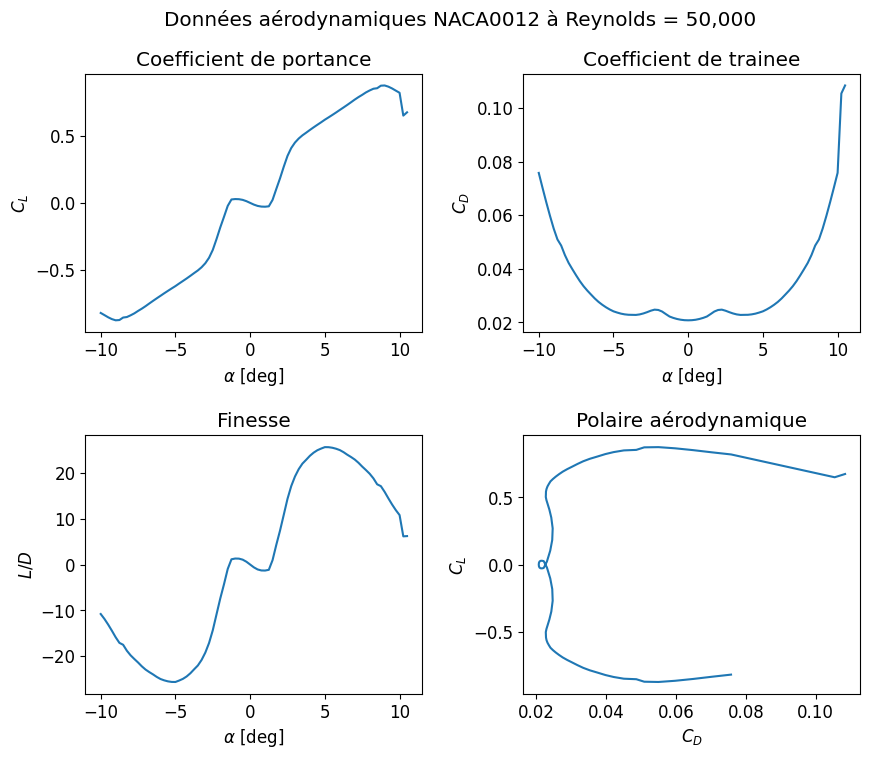

In [23]:
# Tracés côte à côte
# Réglage des espacements entre les figures
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.hspace'] = 0.4
plt.rcParams['figure.subplot.wspace'] = 0.3

fig,axs = plt.subplots(2,2,figsize=(10,8))
axs[0,0].plot(database['Alpha'],database['Cl'])
axs[0,0].set_title('Coefficient de portance')
axs[0,0].set_xlabel(r'$\alpha$ [deg]')
axs[0,0].set_ylabel(r'$C_L$')

axs[0,1].plot(database['Alpha'],database['Cd'])
axs[0,1].set_title('Coefficient de trainee')
axs[0,1].set_xlabel(r'$\alpha$ [deg]')
axs[0,1].set_ylabel(r'$C_D$')

axs[1,0].plot(database['Alpha'],database['Cl']/database['Cd'])
axs[1,0].set_xlabel(r'$\alpha$ [deg]')
axs[1,0].set_ylabel(r'$L/D$')

axs[1,0].set_title('Finesse')
axs[1,1].plot(database['Cd'],database['Cl'])
axs[1,1].set_title('Polaire aérodynamique')
axs[1,1].set_xlabel(r'$C_D$')
axs[1,1].set_ylabel(r'$C_L$')

plt.suptitle('Données aérodynamiques NACA0012 à Reynolds = 50,000')
plt.show()

## Exercice 4 - Tracés de lignes de courant

Nous allons souvent représenter un champ d'écoulement plan avec ses lignes de courant. C'est ce que nous allons voir. 

1. Nous créons une grille régulière entre les coordonnées du plan (-10,-10) et (10,10). Du module `numpy`, nous utilisons `linspace` pour créer les discrétisations régulières et `meshgrid` pour créer la grille. 

In [24]:
# Valeurs des abscisses et ordonnees
x = np.linspace(-10,10,210)
y = np.linspace(-10,10,200)
# Creation de la grille 2D
X, Y = np.meshgrid(x,y)
# Verification des tailles 
print('Vecteur x:',x.shape)
print('Vecteur y:',y.shape)
print('Tableau X:',X.shape)
print('Tableau Y:',Y.shape)

Vecteur x: (210,)
Vecteur y: (200,)
Tableau X: (200, 210)
Tableau Y: (200, 210)


2. Nous créons le champs de  vitesse suivant : 
\begin{align}
\vec{V} = \left\{\begin{matrix}
u &= -x\\
v &= y
\end{matrix}\right.
\end{align}

In [25]:
U = - X
V = Y

3. Nous traçons les lignes de courant avec `streamplot` de `matplotlib`

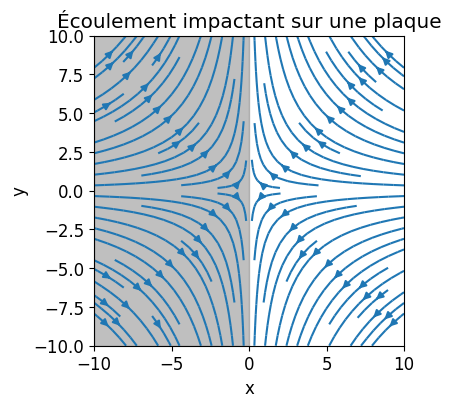

In [26]:
plt.streamplot(X,Y,U,V)
plt.axis('image')
plt.xlabel('x')
plt.ylabel('y')
plt.fill_betweenx(y,-10,0,alpha=0.5,color='gray')
plt.title('Écoulement impactant sur une plaque')
plt.show()

## Exercice 5 - Calcul symbolique

Si vous n'avez pas de TI, sachez que le module [SymPy](https://www.sympy.org) vous permet de faire du calcul symbolique. Nous allons voir quelques fonction de base qui pourront vous être pour la théorie 2D et 3D des profils. 

À nouveau tout d'abord il faut l'importer. On active l'affichage sous forme formel.

In [27]:
import sympy as sb
sb.init_printing()

On souhaite calculer la dérivée et la primitive de la fonction suivante : 
\begin{align}
 \int{{\left(\cos{\theta}\right)}^3 \, d\theta}
\end{align}

1. Les variables formelles sont des objets de type `Symbol`. Définissez le symbole $\theta$.

In [28]:
th = sb.Symbol('theta')

In [ ]:
th

2. Calculez la primitive de ${\left(\cos{\theta}\right)}^3$ à l'aide de la fonction `integrate`. 

In [ ]:
sb.cos(th)**3

In [ ]:
sb.integrate(sb.cos(th)**3,th)